# Task 2: Missing Number

From a function that has as a parameter a vector of positive integers of size 2^n -1, which is missing a number, this vector can be disordered, to search for the missing number from a quantum circuit.

## Imports

In [21]:
import numpy as np
from missing_number import missing_number
from qiskit.visualization import plot_histogram
import random
import time

# Steps

- Generate a list of size $2^n - 1$ and shuffle it.
- Pop the last element of the list. This will be our missing number.
- Run Grover's Algorithm to find the missing number.

The `missing_number` function returns the missing number, the counts of the experiment and the quantum circuit.

In [15]:
# Choose a value of n 
n = 6

# Generate list of length 2^n and random shuffle it
x = np.arange(0,2**n)
random.shuffle(x)

# Pop the last element This will the missing number.
# Now the length of input vector is 2^n - 1
missing_num = x[-1]
x = x[:-1]

print("Input vector:")
print(x)

# Find the missing number
res, counts, circuit =  missing_number(x)

print("Acutal missing number:", missing_num)
print("Result returned by algorithm:", res)

Input vector:
[ 8 49 59 11 54 30 32  5 63 27 24 43  3  2 38  7 46 28 22 39 14 10 48 17
 45 19 33  1 50 57 16 44 36 18  0 15 37 47 56 31 62 34  9 52 58 53 13  6
 40 60 51 61 21 29 41 25 23  4 42 26 35 12 20]
Acutal missing number: 55
Result returned by algorithm: 55


## Visualization

- We can print the quantum circuit used by the experiment.
- We can display the counts obtained from the experiment and can also plot its corresponding histogram.

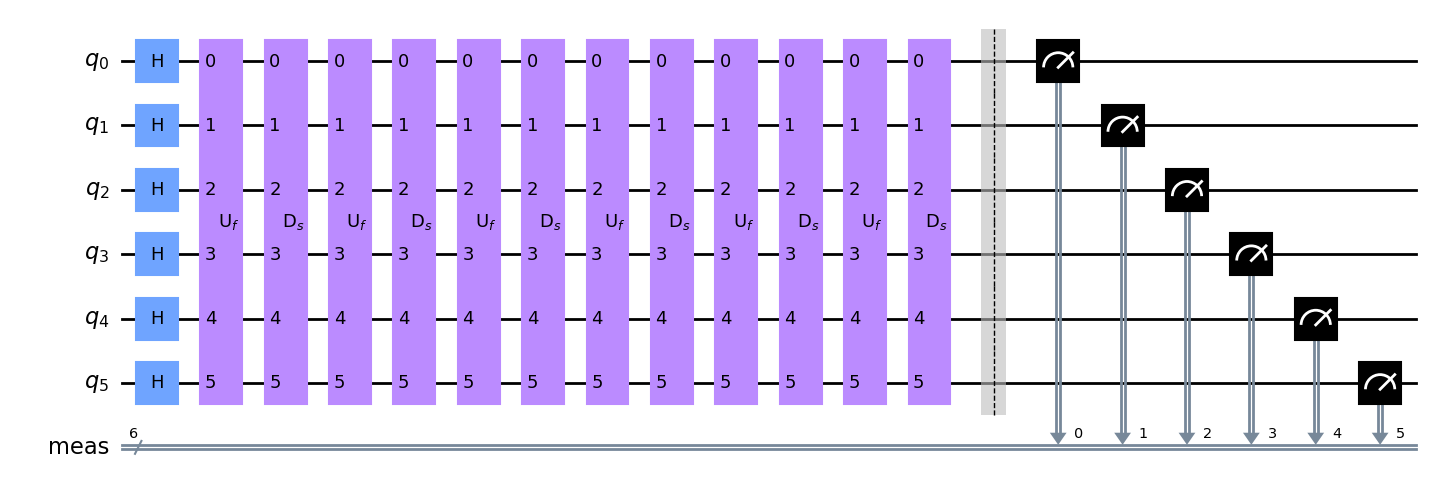

In [16]:
circuit.draw('mpl')

In [17]:
counts

{'110110': 1,
 '110010': 1,
 '011100': 1,
 '110100': 1,
 '111001': 1,
 '110011': 1,
 '110111': 1018}

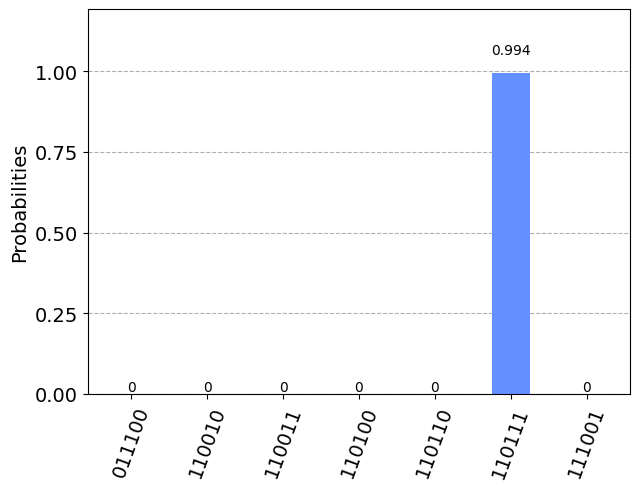

In [18]:
plot_histogram(counts)

## Bonus: 

Which is the largest list that can be implemented? Identify it and describe the result

We know that the Unitary matrix of the oracle, $U_f$ is of the order of $2^{n qubits}$ and n_qubits is equal to $n$. The number of elements in the $U_f$ is of the order $2^{2n}$. Since the size of float is 8 bytes in python, the number of bytes requried to store $U_f$ will be $8\times 2^{2n} = 2^{3 + 2n}$ bytes (1).

I run this program on colab which has 16GB of RAM i.e. $16 \times 2^30 = 2^34$ bytes (2). Solving (1) and (2) we get $n \approx 15$. This means that the largest list that can be implemented is of the size is nearly 15.

We run the algorithm starting with $n = 2$ to $20$. We also print the time taken by the alogrithm to find the missing number.

In [26]:
for n in range(2,5):
    print("n:", n)
    
    # Generate list of length 2^n and random shuffle it
    x = np.arange(0,2**n)
    random.shuffle(x)

    # Pop the last element This will the missing number.
    # Now the length of input vector is 2^n - 1
    missing_num = x[-1]
    x = x[:-1]
    
    # Find the missing number
    start = time.time()
    res, _ , _ =  missing_number(x)
    end = time.time()
    
    # Check if the result is correct
    assert missing_num == res 
    
    print("Acutal missing number:", missing_num)
    print("Result returned by algorithm:", res)
    print("Time taken to find the missing number: {} s".format(np.round(end-start,4)))
    print('-'*50)

n: 2
Acutal missing number: 1
Result returned by algorithm: 1
Time taken to find the missing number: 0.0447 s
--------------------------------------------------
n: 3
Acutal missing number: 7
Result returned by algorithm: 7
Time taken to find the missing number: 0.0601 s
--------------------------------------------------
n: 4
Acutal missing number: 12
Result returned by algorithm: 12
Time taken to find the missing number: 0.1039 s
--------------------------------------------------
